In [3]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [4]:
df = pd.read_csv('heart.csv')

In [5]:
df

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[303 rows x 14 columns]

In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [7]:
df.describe()

age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

            thall      output  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [8]:
px.imshow(df.corr(),title="Correlation Plot of the Heat Failure Prediction")

In [9]:
fig=px.histogram(df, 
                 x="output",
                 color="sex",
                 hover_data=df.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()

In [10]:
fig=px.histogram(df,
                 x="cp",
                 color="sex",
                 hover_data=df.columns,
                 title="Types of Chest Pain"
                )
fig.update_layout(bargap=0.2)
fig.show()

In [11]:
fig=px.histogram(df,
                 x="sex",
                 hover_data=df.columns,
                 title="Sex Ratio in the Data")
fig.update_layout(bargap=0.2)
fig.show()

[]

<Figure size 2160x1440 with 0 Axes>

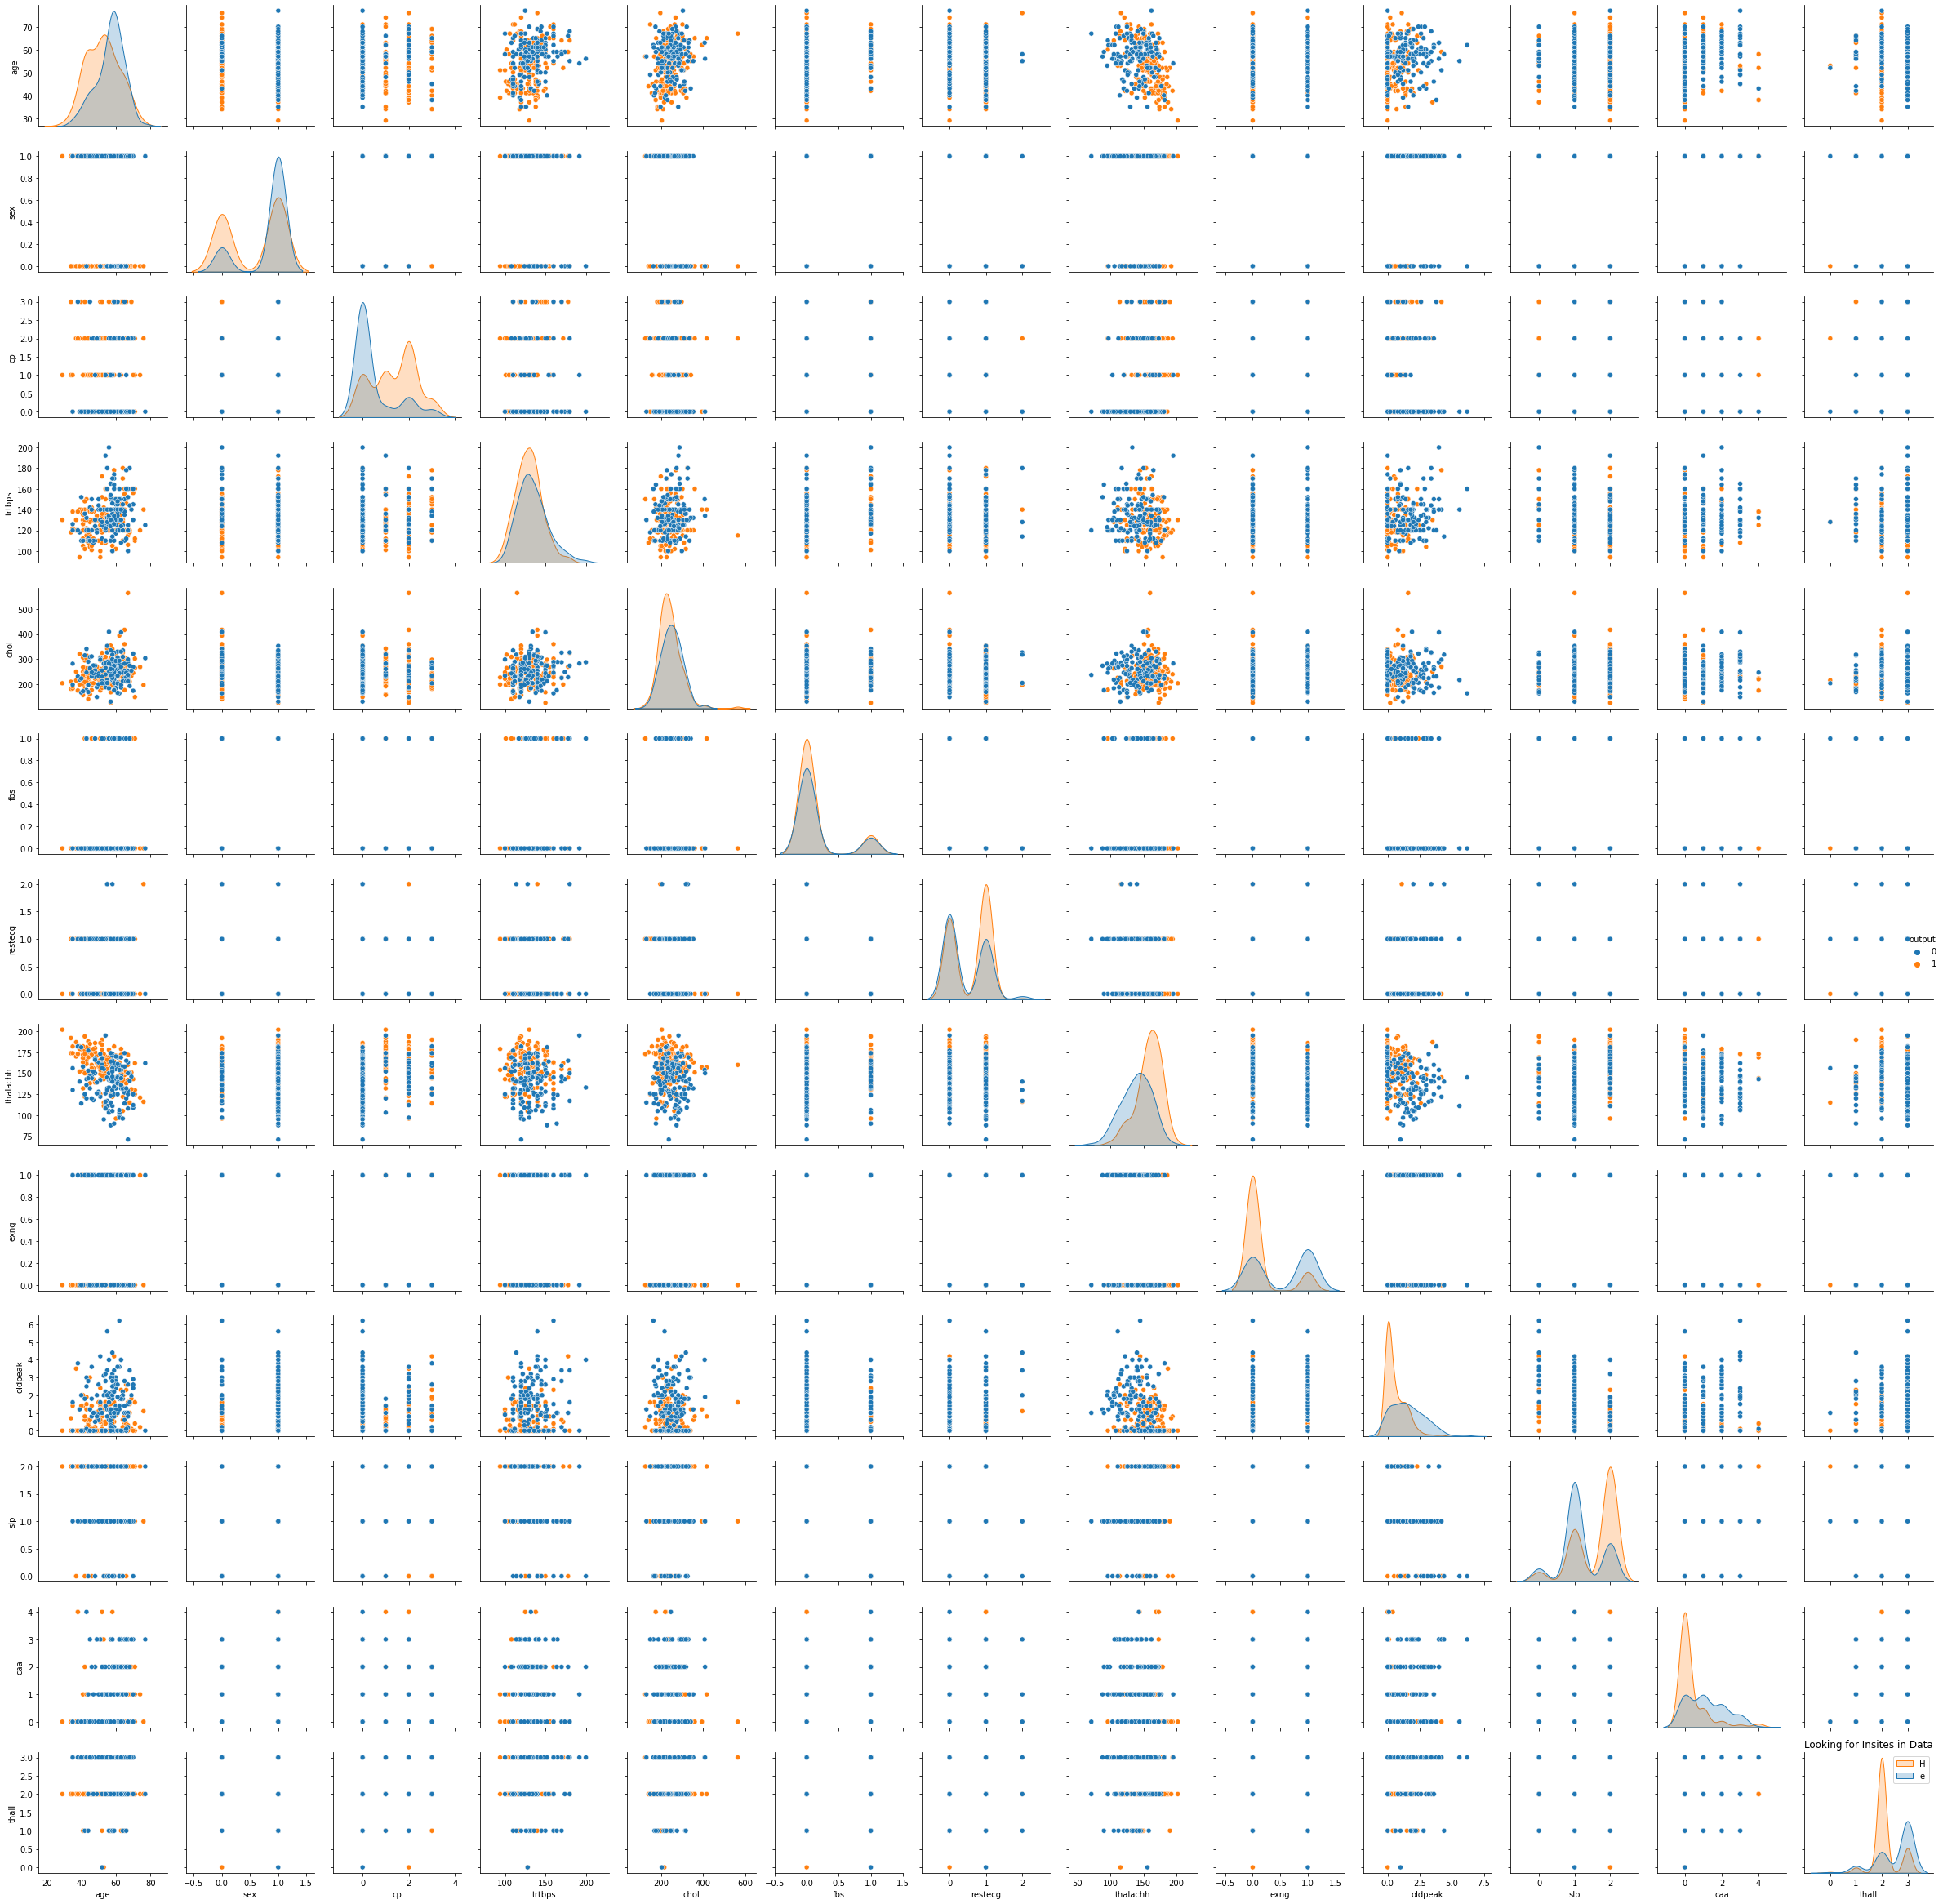

In [12]:
plt.figure(figsize=(30,20))
sns.pairplot(df,hue="output")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

In [13]:
X = df.drop('output', axis=1)

In [14]:
y = df.output

In [15]:
X

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  
0      0      1  
1      0      2  
2      0      2  
3      0      2  
4      0      2  
..   ...    ...  
298    0      3  
299    0      3  
300    2      3  
301    1      3  
302    1      2  

[303 rows x 13 columns]

In [16]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [18]:
clf = tree.DecisionTreeClassifier()

In [19]:
parametrs = {'criterion' : ['gini', 'entropy'], 'max_depth': range(1, 20)}

In [20]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=5)

In [21]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20)})

In [22]:
grid_search_cv_clf.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [23]:
y_pred = grid_search_cv_clf.predict(X_test)

In [24]:
accuracy_score(y_test, y_pred)

0.73

In [25]:
precision_score(y_test, y_pred)

0.7580645161290323

In [26]:
recall_score(y_test, y_pred)

0.7966101694915254

In [27]:
f1_score(y_test, y_pred)

0.7768595041322315

In [28]:
parametrs_new = {'criterion' : ['gini', 'entropy'], 'max_depth': range(1, 20),
                 'min_samples_split': range(10, 130, 10),
                 'min_samples_leaf' : range(10, 100, 10)   
                }

In [29]:
grid_search_cv_new_clf = GridSearchCV(clf, parametrs_new, cv=5)

In [30]:
grid_search_cv_new_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20),
                         'min_samples_leaf': range(10, 100, 10),
                         'min_samples_split': range(10, 130, 10)})

In [31]:
grid_search_cv_new_clf.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 10,
 'min_samples_split': 10}

In [32]:
y_pred_new = grid_search_cv_new_clf.predict(X_test)

In [33]:
accuracy_score(y_test, y_pred_new)

0.74

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
clf_rf = RandomForestClassifier()

In [2]:
parametrs_rf = {'n_estimators' : [10, 20, 30], 'max_depth' : range(2, 15)}

In [3]:
grid_search_cv_clf_rf =GridSearchCV(clf_rf, parametrs_rf, cv=5)

NameError: name 'GridSearchCV' is not defined

In [1]:
grid_search_cv_clf_rf.fit(X, y)

NameError: name 'grid_search_cv_clf_rf' is not defined

In [40]:
grid_search_cv_clf_rf.best_params_

{'max_depth': 5, 'n_estimators': 30}

In [41]:
y_pred_rf = grid_search_cv_clf_rf.predict(X_test)

In [42]:
accuracy_score(y_test, y_pred_rf)

0.79